<br>
<span style="font-family:Cursive;font-variant:small-caps;color:000000;"> <em>Dia 7</em>:</span>


# Estudi d'un text

### Programa que representa la llargada de les frases d'un text

<br>

<b> Descripció: </b>Aquest programa representa un gràfic amb la llargada de les frases d'un text.

<b> Input: </b>Text. <br>
<b> Output: </b>Gràfic i dades sobre la distribució.

<b> Problemes: </b>
<ol>

<li>La funcio d'entrada només permet canviar els coeficients {$c_{1}, c_{2}, c_{3}, c_{4}$} de la funció polinòmica:  
<br>
$$f(x) = c_{1}x^3 + c_{2}x^2 + c_{3}x + c_{4}$$</li>
<br>
<li> Cal implementar més funcions i millorar el mètode d'entrada de coeficients. </li>
<li> Actualització lenta del gràfic. </li>
<li> Eix $y$ o $f(x)$ del gràfic centrat nomes en $\mathbb{R} > 0$. Cal reprogramar per emmarcar tot $\mathbb{R}$.</li>
<li> Widgets situats massa verticalment, impedeixen visió completa del gràfic. Cal resituar-los intel·ligentment</li>

<br>
<span style="font-family:Cursive;font-variant:small-caps;color:000000;"> Anar a [Dia 6](Calculadora d'integrals.ipynb) </span>

<br>
<span style="font-family:Cursive;font-variant:small-caps;color:000000;"> Anar a [Dia 8](Estudi d'un text.ipynb) </span>

<br>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as wdg
from unidecode import unidecode
import pandas as pd

%matplotlib inline

In [2]:
sText = wdg.Textarea(description = "Text:", value = "Inserta text. Aqui no hi ha limit")
sBarres = wdg.IntSlider(min=1, max = 40, value=10, description="Bins")
sNum = wdg.IntSlider(min=0, max = 100, value=1, description="Frase")

In [3]:
def funcio(text, barres, num):

    frases = text.split(".")

    llargada = []


    for i in range(len(frases)):

        ll = len(frases[i].split())

        if ll > 0:
            llargada.append(ll)
    
    if len(llargada) > 0:
        Xmax = max(llargada)
    else:
        Xmax = 1
    
    pndas = pd.Series(llargada)
    pdd = pndas.describe()
    bi = np.linspace(0, Xmax, barres)
    
    plt.figure(figsize = (12, 8))
    axes = plt.gca()
    axes.set_xlim(-5, Xmax+5)
    
    counts, edges, patches = plt.hist(llargada, bins = bi, color = "orange", lw = 0.5)
    patches[0].set_snap(True)
    
    
    
    yl = axes.get_ylim()[1]
    
    plt.text(Xmax-Xmax*.1, yl-yl*.05, "Promig frase = {} paraules/frase".format(round(pdd[1], 3)), horizontalalignment='center')
    plt.text(Xmax-Xmax*.1, yl-yl*.1, "Text complet = {} frases".format(round(pdd[0], 3)), horizontalalignment='center')
    plt.text(Xmax-Xmax*.1, yl-yl*.15, "Frase mes llarga = {} paraules".format(round(pdd[7], 3)), horizontalalignment='center')
    plt.text(Xmax-Xmax*.1, yl-yl*.2, "Desviacio estandard = {}".format(round(pdd[2], 3)), horizontalalignment='center')
    
    plt.show()
    
    return str(unidecode(frases[num]) + ".")

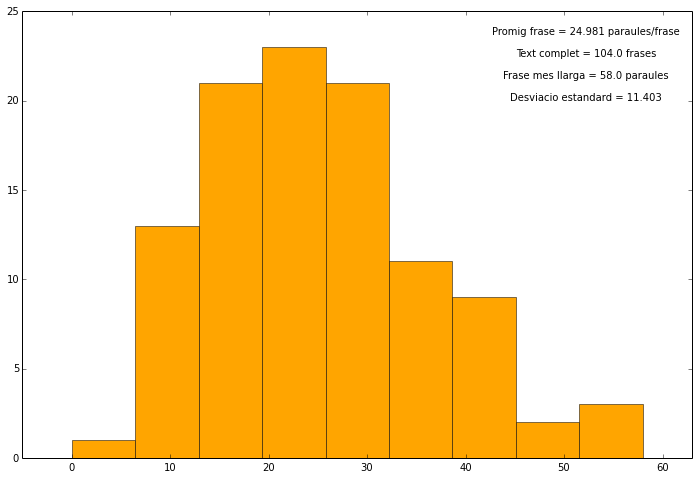

" Dos policies afganesos la van enfilar a la teulada d'un porxo no gaire alt, elevant-la damunt de la gentada."

In [4]:
wdg.interactive(funcio, text = sText, barres = sBarres, num = sNum)